<h1> <span style="color: #2471A3  ">Recherche sur la distance de mahalanobis</span> </h1>
<h3> Latifa Ben Amor 3DNI1

<h3>
<span style="color: #C0392B "> I. Introduction :   </span>
    </h3 

La distance de Mahalanobis est une métrique de distance multivariée efficace qui mesure la distance entre un point (vecteur) et une distribution.
Il a d'excellentes applications dans la détection d'anomalies multivariées, la classification sur des ensembles de données très déséquilibrés et la classification à une classe et des cas d'utilisation plus inexploités.

<h3>
<span style="color: #C0392B  ">II. Définition de la distance de mahalanobis :  </span>
    </h3 

La distance de Mahalonobis est la distance entre un point et une distribution. Et non entre deux points distincts. C'est effectivement un équivalent multivarié de la distance euclidienne.

Il a été introduit par le professeur P. C. Mahalanobis en 1936 et a été utilisé dans diverses applications statistiques depuis. Cependant, il n'est pas si bien connu ou utilisé dans la pratique de l'apprentissage automatique.

<h5> => Donc, d'un point de vue informatique, en quoi la distance de Mahalanobis est-elle différente de la distance euclidienne ?</h5>

<h5> 1. It transforms the columns into uncorrelated variables</h5>
<h5> 2. Scale the columns to make their variance equal to 1</h5>
<h5> 3. Finally, it calculates the Euclidean distance.</h5>

<h3>
<span style="color: #C0392B ">III. Les mathématiques et l'intuition derrière Mahalanobis Distance : </span>
    </h3 

#### La formule pour calculer la distance de Mahalanobis est la suivante :

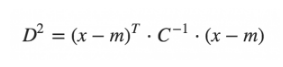

<h5>
<span style="color: #1F618D ">Prenons le (x – m)^T . C^(-1) terme</span>
    </h5>
<h5>
<span style="color: #1F618D ">(x – m) est essentiellement la distance du vecteur à la moyenne. Nous divisons ensuite cela par la matrice de covariance (ou multiplions par l'inverse de la matrice de covariance).</span>
    </h5>

<h5>
<span style="color: #1F618D ">Si vous y réfléchissez, il s'agit essentiellement d'un équivalent multivarié de la normalisation régulière (z = (x – mu)/sigma). C'est-à-dire z = (vecteur x) – (vecteur moyen) / (matrice de covariance).</span>
    </h5>

#### Alors, quel est l'effet de la division par la covariance?

<h7>Si les variables de votre ensemble de données sont fortement corrélées, la covariance sera élevée. La division par une grande covariance réduira efficacement la distance.</h7>

<h7>De même, si les X ne sont pas corrélés, alors la covariance n'est pas élevée et la distance n'est pas beaucoup réduite.</h7>

<h7>Donc efficacement, il aborde à la fois les problèmes d'échelle ainsi que la corrélation des variables dont nous avons parlé dans l'introduction.</h7>

<h3>
<span style="color: #C0392B ">IIV. Calcule de la distance de Mahalanobis en Python : </span>
    </h3 

In [3]:
import pandas as pd
import scipy as sp
import numpy as np

filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]
df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


<h3>
<span style="color: #117A65 ">La fonction pour calculer la distance de Mahalanobis</span>
    </h3>

In [5]:
def mahalanobis(x=None, data=None, cov=None):
    """Calculer la distance de Mahalanobis entre chaque ligne de x et les données
    x    : vecteur ou matrice de données avec p colonnes.
    data :tableau de la distribution à partir de laquelle la distance de Mahalanobis de chaque observation de x doit être calculée.
    cov  : matrice de covariance (p x p) de la distribution. Si Aucun, sera calculé à partir des données.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df[['carat', 'depth', 'price']].head(500)
df_x['mahala'] = mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()

,carat,depth,price,mahala
0,0.23,61.5,326,1.709860
1,0.21,59.8,326,3.540097
2,0.23,56.9,327,12.715021
3,0.29,62.4,334,1.454469
4,0.31,63.3,335,2.347239


<h3>
<span style="color: #C0392B  ">V. les cas d'utilisation de la distance de mahalanobis :</span>
    </h3 

<h3>
<span style="color: #5D6D7E ">Cas d'utilisation 1 : Détection des valeurs aberrantes multivariées à l'aide de la distance de Mahalanobis</span>
    </h3 

En supposant que la statistique de test suit une distribution du chi carré avec « n » degrés de liberté, la valeur critique à un niveau de signification de 0,01 et 2 degrés de liberté est calculée comme suit :

In [6]:
# Valeurs critiques pour deux degrés de liberté
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

9.21034037197618

<h5>=> Cela signifie qu'une observation peut être considérée comme extrême si sa distance de Mahalanobis dépasse 9,21.</h5>

Avec P valeurs pour déterminer si une observation est extrême ou non :

In [8]:
# Calculer les P-Valeurs
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Valeurs extrêmes avec un niveau de signification de 0,01
df_x.loc[df_x.p_value < 0.01].head(10)

,carat,depth,price,mahala,p_value
2,0.23,56.9,327,12.715021,0.001734
91,0.86,55.1,2757,23.909643,0.000006
97,0.96,66.3,2759,11.781773,0.002765
172,1.17,60.2,2774,9.279459,0.009660
204,0.98,67.9,2777,20.086616,0.000043
221,0.70,57.2,2782,10.405659,0.005501
227,0.84,55.1,2782,23.548379,0.000008
255,1.05,65.8,2789,11.237146,0.003630
284,1.00,58.2,2795,10.349019,0.005659
298,1.01,67.4,2797,17.716144,0.000142


<h3>
<span style="color: #5D6D7E ">Cas d'utilisation 2 : Distance de Mahalanobis pour les problèmes de classification</span>
    </h3 

La distance de Mahalanobis peut être utilisée pour des problèmes de classification. Une implémentation naïve d'un classificateur Mahalanobis est codée ci-dessous. L'intuition est qu'une observation se voit attribuer la classe dont elle est la plus proche en fonction de la distance de Mahalanobis.

Voyons un exemple d'implémentation sur le jeu de données BreastCancer, où l'objectif est de déterminer si une tumeur est bénigne ou maligne.

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv', 
                 usecols=['Cl.thickness', 'Cell.size', 'Marg.adhesion', 
                          'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 
                          'Mitoses', 'Class'])

df.dropna(inplace=True)  
df.head()

,Cl.thickness,Cell.size,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,2,1.0,3,1,1,0
1,5,4,5,7,10.0,3,2,1,0
2,3,1,1,2,2.0,3,1,1,0
3,6,8,1,3,4.0,3,7,1,0
4,4,1,3,2,1.0,3,1,1,0


Séparons l'ensemble de données dans un rapport 70:30 en tant qu'entraînement et test. Et l'ensemble de données d'apprentissage est divisé en groupes homogènes de classes 'pos'(1) et 'neg'(0).
Pour prédire la classe de l'ensemble de données de test, nous mesurons les distances de Mahalanobis entre une observation donnée (ligne) et les ensembles de données positifs (xtrain_pos) et négatifs (xtrain_neg).

Ensuite, cette observation est attribuée à la classe en fonction du groupe dont elle est la plus proche.

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=.3, random_state=100)

# Diviser les données d'entraînement en positive et negative
xtrain_pos = xtrain.loc[ytrain == 1, :]
xtrain_neg = xtrain.loc[ytrain == 0, :]

Construisons le MahalanobiBinaryClassifier. Pour ce faire, on définie les méthodes predict_proba() et predict().

In [13]:
class MahalanobisBinaryClassifier():
    def __init__(self, xtrain, ytrain):
        self.xtrain_pos = xtrain.loc[ytrain == 1, :]
        self.xtrain_neg = xtrain.loc[ytrain == 0, :]

    def predict_proba(self, xtest):
        pos_neg_dists = [(p,n) for p, n in zip(mahalanobis(xtest, self.xtrain_pos), mahalanobis(xtest, self.xtrain_neg))]
        return np.array([(1-n/(p+n), 1-p/(p+n)) for p,n in pos_neg_dists])

    def predict(self, xtest):
        return np.array([np.argmax(row) for row in self.predict_proba(xtest)])


clf = MahalanobisBinaryClassifier(xtrain, ytrain)        
pred_probs = clf.predict_proba(xtest)
pred_class = clf.predict(xtest)

# Pred and Truth
pred_actuals = pd.DataFrame([(pred, act) for pred, act in zip(pred_class, ytest)], columns=['pred', 'true'])
print(pred_actuals[:5])

   pred  true
0     0     0
1     1     1
2     0     0
3     0     0
4     0     0


<h4>classification de l'ensemble de données de test :</h4>

In [14]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
truth = pred_actuals.loc[:, 'true']
pred = pred_actuals.loc[:, 'pred']
scores = np.array(pred_probs)[:, 1]
print('AUROC: ', roc_auc_score(truth, scores))
print('\nConfusion Matrix: \n', confusion_matrix(truth, pred))
print('\nAccuracy Score: ', accuracy_score(truth, pred))
print('\nClassification Report: \n', classification_report(truth, pred))

AUROC:  0.990974358974359

Confusion Matrix: 
 [[113  17]
 [  0  75]]

Accuracy Score:  0.9170731707317074

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       130
           1       0.82      1.00      0.90        75

    accuracy                           0.92       205
   macro avg       0.91      0.93      0.91       205
weighted avg       0.93      0.92      0.92       205



<h3>
<span style="color: #5D6D7E ">Cas d'utilisation 3 : Classification à une classe</span>
    </h3 

La classification à une classe est un type d'algorithme dans lequel l'ensemble de données d'apprentissage contient des observations appartenant à une seule classe.

Avec seulement cette information connue, l'objectif est de déterminer si une observation donnée dans un nouvel ensemble de données (ou de test) appartient à cette classe.

<h5>Essayons ceci sur l'ensemble de données BreastCancer, mais cette fois, nous ne considérerons que les observations malignes (colonne de classe=1) dans les données d'entraînement.</h5>

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv', 
                 usecols=['Cl.thickness', 'Cell.size', 'Marg.adhesion', 
                          'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 
                          'Mitoses', 'Class'])

df.dropna(inplace=True)

<h5>Diviser 50 % de l'ensemble de données en entraînement et test. Seuls les 1 sont conservés dans les données d'entraînement.</h5>

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=.5, random_state=100)

# Split the training data as pos and neg
xtrain_pos = xtrain.loc[ytrain == 1, :]

on construit le MahalanobisOneClassClassifier eton obtient la distance mahalanobis de chaque point de données en x à partir de l'ensemble d'apprentissage (xtrain_pos).

In [17]:
class MahalanobisOneclassClassifier():
    def __init__(self, xtrain, significance_level=0.01):
        self.xtrain = xtrain
        self.critical_value = chi2.ppf((1-significance_level), df=xtrain.shape[1]-1)
        print('Critical value is: ', self.critical_value)

    def predict_proba(self, xtest):
        mahalanobis_dist = mahalanobis(xtest, self.xtrain)
        self.pvalues = 1 - chi2.cdf(mahalanobis_dist, 2)
        return mahalanobis_dist

    def predict(self, xtest):
        return np.array([int(i) for i in self.predict_proba(xtest) > self.critical_value])

clf = MahalanobisOneclassClassifier(xtrain_pos, significance_level=0.05)
mahalanobis_dist = clf.predict_proba(xtest)

# Pred and Truth
mdist_actuals = pd.DataFrame([(m, act) for m, act in zip(mahalanobis_dist, ytest)], columns=['mahal', 'true_class'])
print(mdist_actuals[:5])   

Critical value is:  14.067140449340169
       mahal  true_class
0  13.104716           0
1  14.408570           1
2  14.932236           0
3  14.588622           0
4  15.471064           0


nous avons la distance de Mahalanobis et la classe réelle de chaque observation.

on attendant que ces observations avec une faible distance de Mahalanobis soient de 1.

Donc, on fait le trie des mdist_actuals par distance de Mahalanobis et le quantile coupe les lignes en 10 groupes de taille égale. Les observations dans les quantiles supérieurs devraient avoir plus de 1 par rapport à celles du bas.

In [18]:
# quantile coupé en 10 morceaux
mdist_actuals['quantile'] = pd.qcut(mdist_actuals['mahal'], 
                                    q=[0, .10, .20, .3, .4, .5, .6, .7, .8, .9, 1], 
                                    labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# trier par distance mahalanobis
mdist_actuals.sort_values('mahal', inplace=True)
perc_truths = mdist_actuals.groupby('quantile').agg({'mahal': np.mean, 'true_class': np.sum}).rename(columns={'mahal':'avg_mahaldist', 'true_class':'sum_of_trueclass'})
print(perc_truths)

          avg_mahaldist  sum_of_trueclass
quantile                                 
1              3.765496                33
2              6.511026                32
3              9.272944                30
4             12.209504                20
5             14.455050                 4
6             15.684493                 4
7             17.368633                 3
8             18.840714                 1
9             21.533159                 2
10            23.524055                 1


près de 90 % des 1 (cas malins) se situent dans les premiers 40 % de la distance de Mahalanobis. Incidemment, tous sont inférieurs à la valeur critique pf 14,05. Alors, prenons la valeur critique comme seuil et marquons ces observations avec une distance de Mahalanobis inférieure au seuil comme positives.

In [19]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Positive if mahalanobis 
pred_actuals = pd.DataFrame([(int(p), y) for y, p in zip(ytest, clf.predict_proba(xtest) < clf.critical_value)], columns=['pred', 'true'])

# Accuracy Metrics
truth = pred_actuals.loc[:, 'true']
pred = pred_actuals.loc[:, 'pred']
print('\nConfusion Matrix: \n', confusion_matrix(truth, pred))
print('\nAccuracy Score: ', accuracy_score(truth, pred))
print('\nClassification Report: \n', classification_report(truth, pred))


Confusion Matrix: 
 [[183  29]
 [ 15 115]]

Accuracy Score:  0.8713450292397661

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       212
           1       0.80      0.88      0.84       130

    accuracy                           0.87       342
   macro avg       0.86      0.87      0.87       342
weighted avg       0.88      0.87      0.87       342



#### => sans la connaissance de la classe bénigne, nous sommes en mesure de prédire avec précision la classe de 87 % des observations.